In [109]:
# Euclidean distance
# sqrt ([n]sigma[i] (ai - pi)^2)
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
import pandas as pd
import random 
style.use ('fivethirtyeight')

In [107]:
def euclidean_distance(x , y):
    distance = []
    for i in range(len(x)):
        sum_xy = 0   
        for ii in range(len(x[i])):
            sum_xy = sum_xy + (x[i][ii] - y[ii])**2
        distance.append(sqrt(sum_xy))
    return distance

In [108]:
x = [[2,3], [4,5]]
y = [7,8]
print( euclidean_distance(x,y))

[7.0710678118654755, 4.242640687119285]


In [87]:
dataset = {'k': [[1 , 2],[2 , 3], [2, 4]] , 'r': [[5, 6],[7,7],[8,5]]}
new_feature = [1,7]

In [88]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)

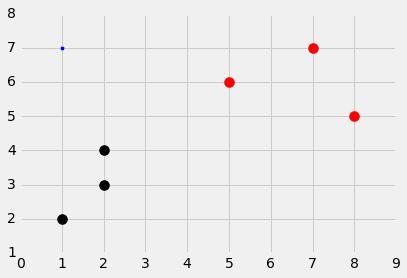

In [89]:
plt.scatter(new_feature[0], new_feature[1])
plt.show()

In [163]:
def knn(data, predict, k=3):
    if len(data)>=k:
        warnings.warn('k is set to value less than total voting groups')
    distances = []
    for group in data:
        for features in data[group]:
            euc_dist = np.sqrt(np.sum((np.array(features)- np.array(predict))**2))
            # np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euc_dist, group])
    #print(sorted(distances)[:k])
    votes = [ i[1] for i in sorted(distances)[:k] ]
    #print('votes: ', votes)
     # 1st result's 1 part gives classification
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / float(k) 
    print (vote_result, confidence)
    return vote_result , confidence

In [90]:
result = knn(dataset, new_feature, k=3)
print(result)

[[3.1622776601683795, 'k'], [4.1231056256176606, 'k'], [4.1231056256176606, 'r']]
('votes: ', ['k', 'k', 'r'])
k


In [110]:
# Using WISCONSIN Breast Cancer Data Set 

# id,clump_thickness,size_uni,shape_uni,marg_adhesion,epith_size,bare_nucleoli,bland_chrom,normal_nucleoli,mitoses,class
df = pd.read_csv("breast-cancer-wisconsin.data")

# replace missing data as outlier
df.replace('?', -99999, inplace = True)

# remove non-relavent features
df.drop(['id'], 1, inplace=True)

# make everything float
full_data = df.astype(float).values.tolist()



In [130]:
# Shuffle data 
print(full_data[:5])
random.shuffle(full_data)
print(20*'---')
print(full_data[:5])

[[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [7.0, 6.0, 3.0, 2.0, 5.0, 10.0, 7.0, 4.0, 6.0, 4.0], [10.0, 5.0, 7.0, 3.0, 3.0, 7.0, 3.0, 3.0, 8.0, 4.0]]
------------------------------------------------------------
[[3.0, 4.0, 5.0, 2.0, 6.0, 8.0, 4.0, 1.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 10.0, 6.0, 10.0, 10.0, 10.0, 1.0, 4.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [9.0, 8.0, 8.0, 9.0, 6.0, 3.0, 4.0, 1.0, 1.0, 4.0]]


In [131]:
# Slice the data
test_size = 0.2

train_set = { 2:[] , 4:[] }
test_set = { 2:[] , 4:[] }

# last 20% for test
train_data = full_data[:-int(test_size* len(full_data))]
test_data = full_data[-int(test_size* len(full_data)):]

# populate dictionaries with classifications 2 and 4 
for i in train_data:
    train_set[i[-1]].append(i[:-1]) 

for i in test_data:
    test_set[i[-1]].append(i[:-1])


In [165]:
# TEST

correct = 0
total =0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = knn(train_set, data, k=5)
        if group == vote:
            correct = correct + 1
        if group != vote:
            print('incorrect')
        total = total + 1
        # print(group , vote)


print(correct)
print(total)
print('Accuracy:')  
print(correct/float(total)) 

(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 0.6)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(4, 0.6)
incorrect
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 0.6)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(2, 1.0)
(4, 1.0)
(4, 1.0)
(2, 1.0)
incorrect
(4, 1.0)
(4, 1.0)
(4, 1.0)
(4, 1.0)
(4, 0.6)
(4, 1.0)
(4, 1.0)
(4, 1.0)
(4, 1.0)
(4, 0.8)
(4, 0.8)
(4, 1.0)
(2, 0.6)
incorrect
(4, 1.0)
(4, 1.0)
(4, 0.6